In [672]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [673]:
train = pd.read_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [674]:
test = pd.read_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [675]:
train = train.replace(to_replace=['N', 'Y'], value=[0, 1])
train.head()
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


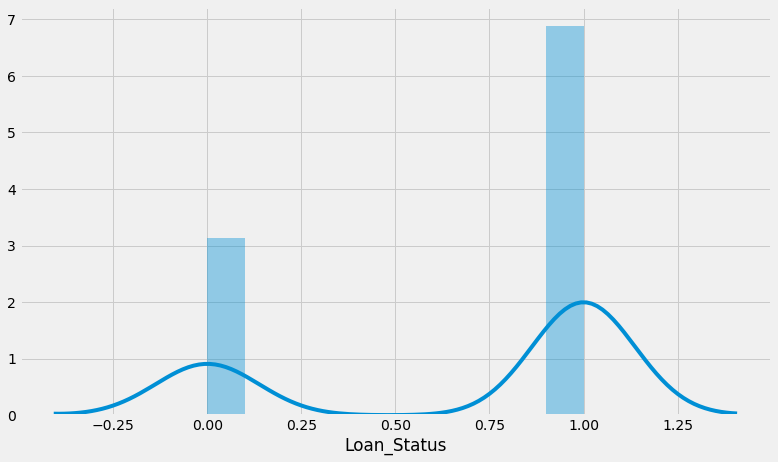

In [676]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(train.Loan_Status, bins = 10)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))

In [677]:
print ("Skew is:", train.Loan_Status.skew())
print("Kurtosis: %f" % train.Loan_Status.kurt())

Skew is: -0.8099980938586473
Kurtosis: -1.348306


In [678]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes
corr =numeric_features.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [679]:
corr['Loan_Status']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

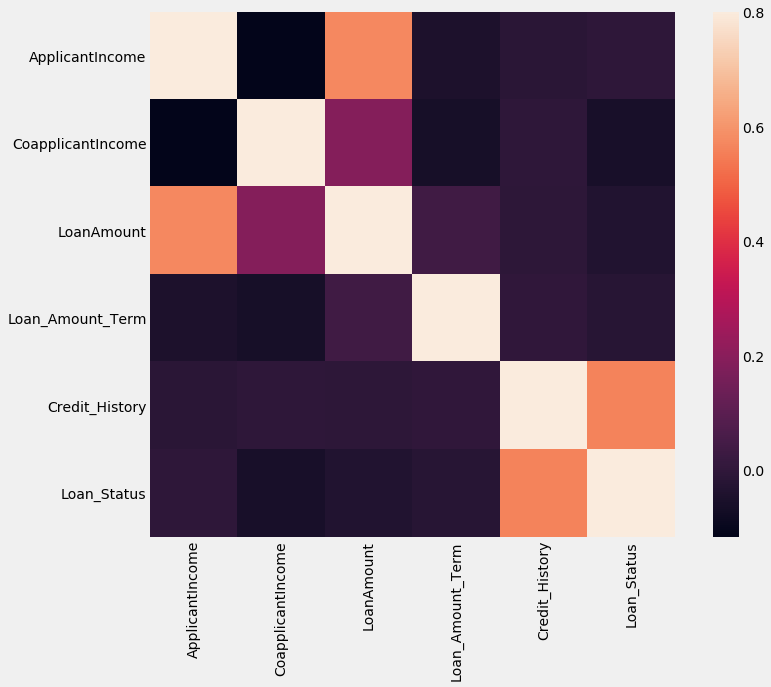

In [680]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

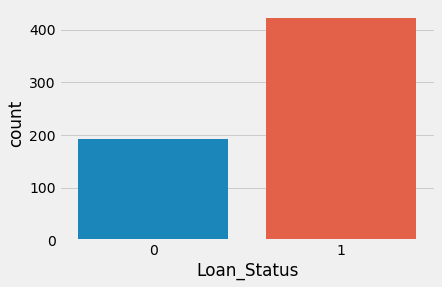

In [681]:
sns.countplot(train.Loan_Status)

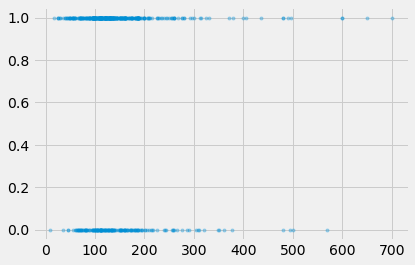

In [682]:
plt.plot(train.LoanAmount, train["Loan_Status"],'.', alpha = 0.3)

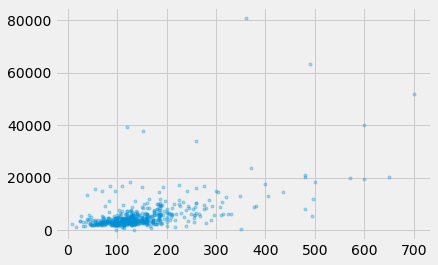

In [683]:
plt.plot(train.LoanAmount, train["ApplicantIncome"],'.', alpha = 0.3)

In [684]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)
train.head()

(614, 14) (367, 13) (981, 14)


C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,train


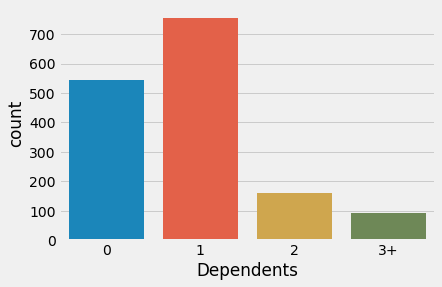

In [685]:
sns.countplot(data.Credit_History)
sns.countplot(data.Dependents)
# data['Dependents'].isna().sum()
# data['Dependents'] = data['Dependents'].fillna(0)
# data['Dependents'].isna().sum()
# sns.countplot(data.Dependents)
# data['Dependents'] = data['Dependents'].replace({'0':0})
sns.countplot(data.Dependents)
data['Education'] = data['Education'].replace({'Not Graduate':0, 'Graduate':1})
data['Married'] = data['Married'].replace({'Yes':1, 'No':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})



In [686]:
numeric_features2 = data.select_dtypes(include = [np.number])
numeric_features2.dtypes


ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Education              int64
Gender               float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status          float64
Married              float64
Self_Employed        float64
dtype: object

In [687]:
corr2 =numeric_features2.corr()
corr2['Loan_Status']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
Credit_History       0.561678
Education            0.085884
Gender               0.019857
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Loan_Status          1.000000
Married              0.089280
Self_Employed       -0.002303
Name: Loan_Status, dtype: float64

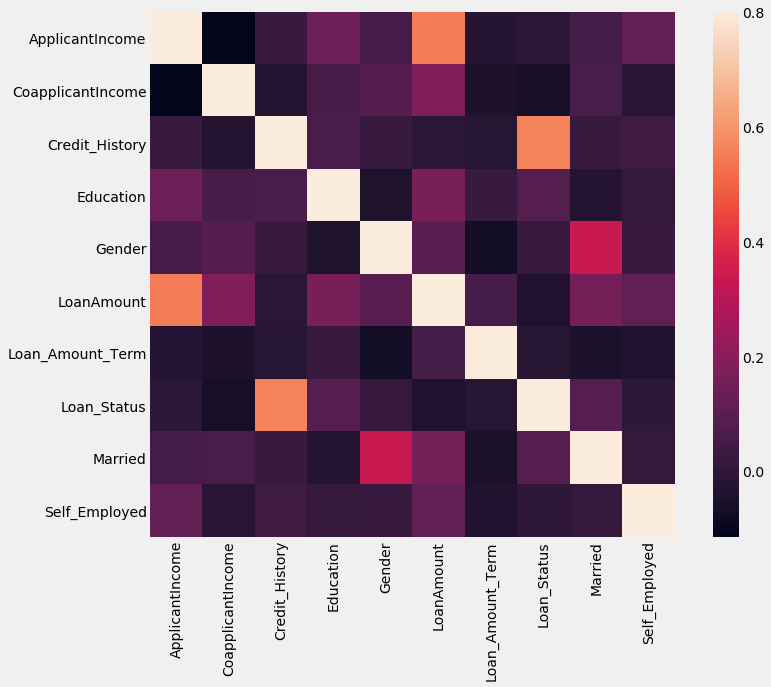

In [688]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr2, vmax=.8, square=True);

In [689]:
data.head()
data['Gender'] = data['Gender'].fillna(1)
data['Dependents'] = data['Dependents'].fillna(0)
data['Married'] = data['Married'].fillna(0)
# value = data['Loan_Amount_Term'].median(skipna = True) 
# data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(value)
value2 = data['LoanAmount'].median(skipna = True) 
data['LoanAmount'] = data['LoanAmount'].fillna(value2)
data['Self_Employed'] = data['Self_Employed'].fillna(0)
data['Credit_History'] = data['Credit_History'].fillna(2)



In [690]:
print(data['ApplicantIncome'].isna().sum())
print(data['CoapplicantIncome'].isna().sum())
print(data['Credit_History'].isna().sum())
print(data['Dependents'].isna().sum())
print(data['Education'].isna().sum())
print(data['Gender'].isna().sum())
print(data['LoanAmount'].isna().sum())
print(data['Loan_Amount_Term'].isna().sum())
print(data['Loan_ID'].isna().sum())
print(data['Loan_Status'].isna().sum())
print(data['Married'].isna().sum())
print(data['Property_Area'].isna().sum())
print(data['Self_Employed'].isna().sum())


0
0
0
0
0
0
0
20
0
367
0
0
0


In [691]:
def process_dependents():
    
    data['Singleton'] = data['Dependents'].map(lambda d: 1 if d=='1' else 0)
    data['Small_Family'] = data['Dependents'].map(lambda d: 1 if d=='2' else 0)
    data['Large_Family'] = data['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    data.drop(['Dependents'], axis=1, inplace=True)
    
    
process_dependents()

In [692]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1, inplace = True)

In [693]:
data['Debt_Income_Ratio'] = data['Total_Income'] / data['LoanAmount']
data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [694]:

def process_loan_term():
    
    data['Very_Short_Term'] = data['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    data['Short_Term'] = data['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    data['Long_Term'] = data['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    data['Very_Long_Term'] = data['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    data.drop('Loan_Amount_Term', axis=1, inplace=True)
    
process_loan_term()

In [695]:
def process_credit_history():
    
    data['Credit_History_Bad'] = data['Credit_History'].map(lambda c: 1 if c==0 else 0)
    data['Credit_History_Good'] = data['Credit_History'].map(lambda c: 1 if c==1 else 0)
    data['Credit_History_Unknown'] = data['Credit_History'].map(lambda c: 1 if c==2 else 0)
    data.drop('Credit_History', axis=1, inplace=True)
    
process_credit_history()

In [696]:

def property_area():
    
    data['rural'] = data['Property_Area'].map(lambda t: 1 if t=='Rural' else 0)
    data['semi_urban'] = data['Property_Area'].map(lambda t: 1 if t=='Semiurban' else 0)
    data['urban'] = data['Property_Area'].map(lambda t: 1 if t=='Urban'  else 0)
    
    data.drop('Property_Area', axis=1, inplace=True)
    
property_area()

In [697]:
def feature_scaling(data):
    data -= data.min()
    data /= data.max()
    return data

In [698]:
data['LoanAmount'] = feature_scaling(data['LoanAmount'])
data['Total_Income'] = feature_scaling(data['Total_Income'])
data['Debt_Income_Ratio'] = feature_scaling(data['Debt_Income_Ratio'])

In [699]:
data.head()

,Education,Gender,LoanAmount,Loan_ID,Loan_Status,Married,Self_Employed,source,Singleton,Small_Family,...,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,rural,semi_urban,urban
0,1,1.0,0.169320,LP001002,1.0,0.0,0.0,train,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,1.0,0.172214,LP001003,0.0,1.0,0.0,train,1,0,...,0,0,0,1,0,1,0,1,0,0
2,1,1.0,0.082489,LP001005,1.0,1.0,1.0,train,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,1.0,0.160637,LP001006,1.0,1.0,0.0,train,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,1.0,0.191027,LP001008,1.0,0.0,0.0,train,0,0,...,0,0,0,1,0,1,0,0,0,1


In [700]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [701]:
train.drop(['source'],axis=1,inplace=True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [702]:
train.to_csv(r"E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\train_modified33.csv",index=False)
test.to_csv(r"E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\test_modified33.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'E:\\backup2\\Data science\\projects_data_science\\loan_prediction\\loan-prediction-problem-dataset\\train_modified33.csv'

In [703]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [704]:
def xvalidation_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [705]:
modified_train = pd.read_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\train_modified33.csv')
modified_train.head()


,Education,Gender,LoanAmount,Loan_ID,Loan_Status,Married,Self_Employed,Singleton,Small_Family,Large_Family,...,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,rural,semi_urban,urban
0,1,1.0,0.169320,LP001002,1.0,0.0,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,1.0,0.172214,LP001003,0.0,1.0,0.0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1,1.0,0.082489,LP001005,1.0,1.0,1.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,1.0,0.160637,LP001006,1.0,1.0,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,1.0,0.191027,LP001008,1.0,0.0,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [706]:
modified_test =pd.read_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\test_modified33.csv')

target = modified_train['Loan_Status']
modified_train.drop(['Loan_ID'], axis = 1, inplace = True)
modified_test.drop(['Loan_ID'],axis=1,inplace=True)


In [707]:
classifier = RandomForestClassifier(n_estimators=50, max_features='sqrt')
classifier = classifier.fit(modified_train, target)

features = pd.DataFrame()
features['Feature'] = modified_train.columns
features['Importance'] = classifier.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)


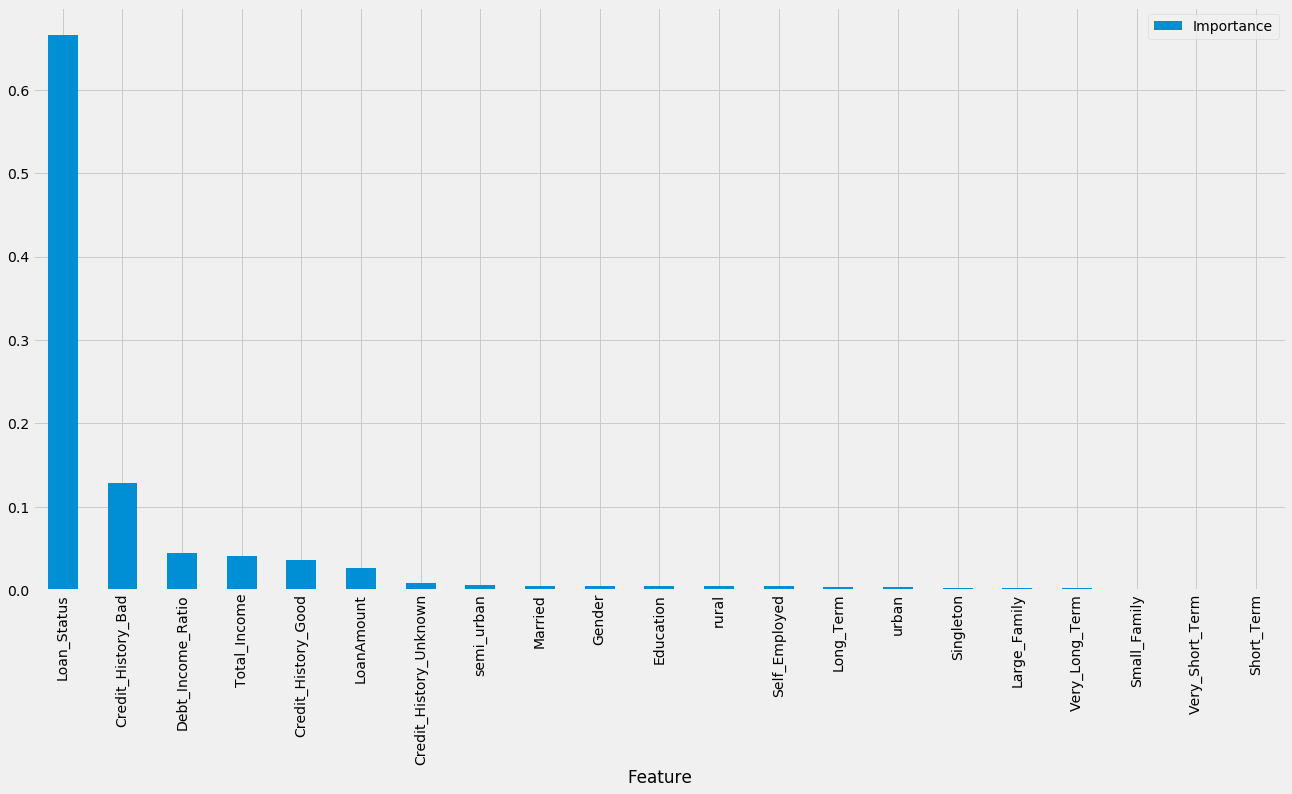

In [708]:
features.plot(kind='bar', figsize=(20, 10))

In [709]:

model = SelectFromModel(classifier, prefit=True)
train_reduced = model.transform(modified_train)
train_reduced.shape

(614, 2)

In [710]:
modified_test.drop(['Loan_Status'], axis = 1, inplace = True)


In [720]:
modified_train.drop(['Loan_Status'], axis = 1, inplace = True)

In [711]:
modified_test.drop(['source'], axis = 1, inplace = True)

In [721]:


parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(modified_train, target)
modified_train.dtypes


Education                   int64
Gender                    float64
LoanAmount                float64
Married                   float64
Self_Employed             float64
Singleton                   int64
Small_Family                int64
Large_Family                int64
Total_Income              float64
Debt_Income_Ratio         float64
Very_Short_Term             int64
Short_Term                  int64
Long_Term                   int64
Very_Long_Term              int64
Credit_History_Bad          int64
Credit_History_Good         int64
Credit_History_Unknown      int64
rural                       int64
semi_urban                  int64
urban                       int64
dtype: object

In [722]:
xvalidation_score(model, modified_train, target, scoring='accuracy')
modified_test.dtypes

Education                   int64
Gender                    float64
LoanAmount                float64
Married                   float64
Self_Employed             float64
Singleton                   int64
Small_Family                int64
Large_Family                int64
Total_Income              float64
Debt_Income_Ratio         float64
Very_Short_Term             int64
Short_Term                  int64
Long_Term                   int64
Very_Long_Term              int64
Credit_History_Bad          int64
Credit_History_Good         int64
Credit_History_Unknown      int64
rural                       int64
semi_urban                  int64
urban                       int64
dtype: object

In [725]:
output = model.predict(modified_test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\test_modified33.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv(r'E:\backup2\Data science\projects_data_science\loan_prediction\loan-prediction-problem-dataset\output48.csv',index=False)